# YOLOv8 Görüntü Sınıflandırma

## Ortam hazırlığı



In [ ]:
# Drive'a bağlanma
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd


'/content'

In [ ]:
%cd /content/drive/MyDrive/YOLOv8/00_image_classification

/content/drive/MyDrive/YOLOv8/00_image_classification


In [ ]:
# Ultralytics'i indirme
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


## Sınıflandırma / Prediction

In [ ]:
# Resim Sınıflandırma / Test / ImageNet
!yolo classify predict model=yolov8l-cls.pt  source="https://www.southernliving.com/thmb/Rz-dYEhwq_82C5_Y9GLH2ZlEoYw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg" save=True

100% 71.7M/71.7M [00:00<00:00, 121MB/s]
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients, 99.7 GFLOPs

100% 123k/123k [00:00<00:00, 4.11MB/s]
100% 755k/755k [00:00<00:00, 12.6MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/00_image_classification/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg: 224x224 golden_retriever 0.99, Newfoundland 0.00, Brittany_spaniel 0.00, Tibetan_terrier 0.00, flat-coated_retriever 0.00, 300.6ms
Speed: 40.7ms preprocess, 300.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


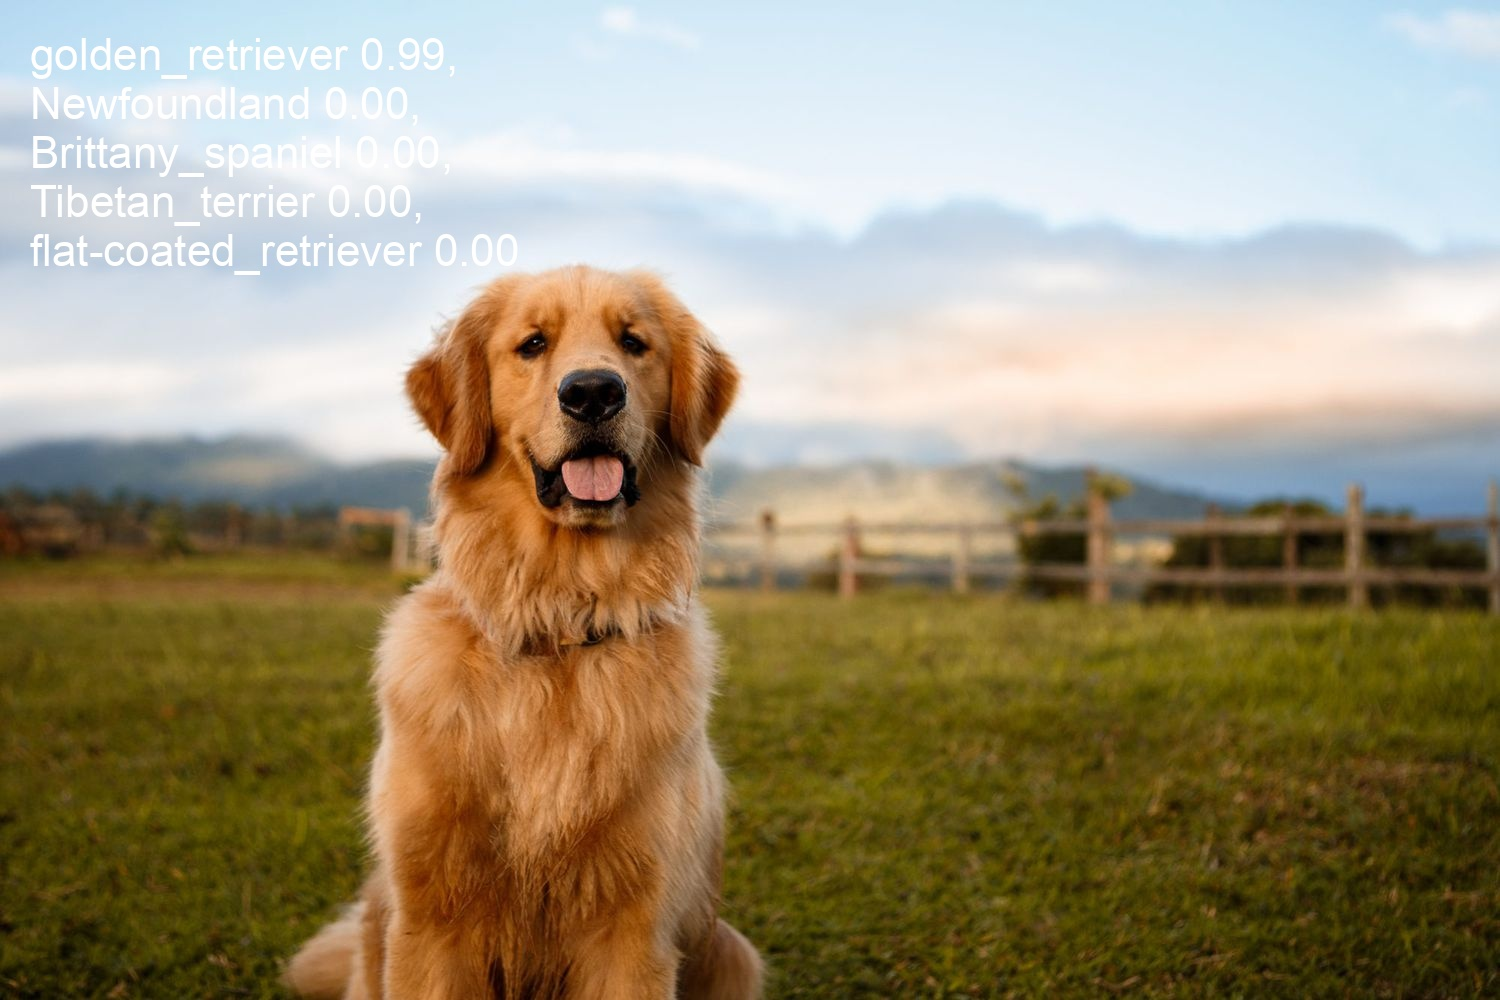

In [ ]:
# Sonuçları inceleme
import cv2
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/predict/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg"

img = cv2.imread(img_path)


cv2_imshow(img)



In [ ]:
import numpy as np
from ultralytics import YOLO

img_path = "/content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/predict/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg"
model_path = "/content/drive/MyDrive/YOLOv8/00_image_classification/yolov8l-cls.pt"

model = YOLO(model_path) #modeli yükle
results = model(img_path)# resmi yükle ve sınıflandır

class_dict = results[0].names
probabilities = results[0].probs.data.tolist()

print("Sınıflar : ", class_dict)
print("Olasılıklar : ", probabilities)

print("Sonuç : ", class_dict[np.argmax(probabilities)])




image 1/1 /content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/predict/gettyimages-837898820-1-4deae142d4d0403dbb6cb542bfc56934.jpg: 224x224 golden_retriever 0.99, Newfoundland 0.00, Brittany_spaniel 0.00, Tibetan_terrier 0.00, Labrador_retriever 0.00, 266.9ms
Speed: 27.4ms preprocess, 266.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Sınıflar :  {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtl

## Eğitim / Training

In [ ]:
# Dosyaları ayıkla

!unzip data/covid_classification.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/covid_classification/train/normal/Normal-7279.png  
  inflating: ./data/covid_classification/train/normal/Normal-728.png  
  inflating: ./data/covid_classification/train/normal/Normal-7280.png  
  inflating: ./data/covid_classification/train/normal/Normal-7281.png  
  inflating: ./data/covid_classification/train/normal/Normal-7282.png  
  inflating: ./data/covid_classification/train/normal/Normal-7285.png  
  inflating: ./data/covid_classification/train/normal/Normal-7286.png  
  inflating: ./data/covid_classification/train/normal/Normal-7287.png  
  inflating: ./data/covid_classification/train/normal/Normal-7289.png  
  inflating: ./data/covid_classification/train/normal/Normal-729.png  
  inflating: ./data/covid_classification/train/normal/Normal-7290.png  
  inflating: ./data/covid_classification/train/normal/Normal-7291.png  
  inflating: ./data/covid_classification/train/normal/Normal-7294.png  
  inflating: ./data

In [ ]:
# Eğitim

!yolo classify train model=yolov8l-cls.pt  data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolov8_classification"

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/covid_classification, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
#Eğitim yarıda kesilirse
#!yolo classify train model=.../last.pt resume=True #Eğitim kaldığı yerden devam ediyor

## Covid Sınıflandırma / Prediction


In [ ]:
# Resim Sınıflandırma
!yolo classify predict model=/content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/yolov8_classification/weights/best.pt  source=inference save=True

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

image 1/12 /content/drive/MyDrive/YOLOv8/00_image_classification/inference/COVID-101.png: 224x224 covid 1.00, viral_pneumonia 0.00, normal 0.00, 10.9ms
image 2/12 /content/drive/MyDrive/YOLOv8/00_image_classification/inference/COVID-227.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 3/12 /content/drive/MyDrive/YOLOv8/00_image_classification/inference/COVID-346.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 4/12 /content/drive/MyDrive/YOLOv8/00_image_classification/inference/COVID-350.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 5/12 /content/drive/MyDrive/YOLOv8/00_image_classification/inference/Normal-181.png: 224x224 normal 1.00, viral_pneumonia 0.00, covid 0.00, 11.0ms
image 6/12 /content/drive/MyDrive/YOLOv8/00_image_classification


image 1/1 /content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/predict2/COVID-350.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 20.1ms
Speed: 4.7ms preprocess, 20.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Sınıflar :  {0: 'covid', 1: 'normal', 2: 'viral_pneumonia'}
Olasılıklar :  [1.0, 1.5703960484433899e-12, 8.007285698212463e-13]
Sonuç :  covid


array([[[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [251, 251, 251]],

       [[253, 253, 253],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [196, 196, 196],
        [193, 193, 193],
        [187, 187, 187]],

       [[252, 252, 252],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [119, 119, 119],
        [110, 110, 110],
        [100, 100, 100]],

       ...,

       [[248, 248, 248],
        [251, 251, 251],
        [254, 254, 254],
        ...,
        [ 80,  80,  80],
        [ 71,  71,  71],
        [ 57,  57,  57]],

       [[250, 250, 250],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 70,  70,  70]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 72,  72,  72],
        [ 74,  74,  74],
        [ 70,  70,  70]]], dtype=uint8)
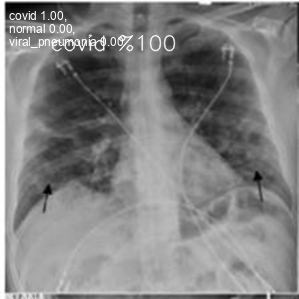

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/predict2/COVID-350.png"
model_path = "/content/drive/MyDrive/YOLOv8/00_image_classification/runs/classify/yolov8_classification/weights/best.pt"

model = YOLO(model_path) #modeli yükle
results = model(img_path)# resmi yükle ve sınıflandır

class_dict = results[0].names
probabilities = results[0].probs.data.tolist()

print("Sınıflar : ", class_dict)
print("Olasılıklar : ", probabilities)

print("Sonuç : ", class_dict[np.argmax(probabilities)])

name = class_dict[np.argmax(probabilities)]
max_prob = int(np.max(probabilities) * 100)

##print(name +" "+ "%"+str(max_prob))

text = name +" "+ "%"+str(max_prob)

img=cv2.imread(img_path)
cv2.putText(img, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 1, cv2.LINE_AA)